In [173]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("C:/Users/user/Desktop/train_users_2.csv")
test = pd.read_csv("C:/Users/user/Desktop/test_users.csv")
age_gen = pd.read_csv("C:/Users/user/Desktop/age_gender_bkts.csv")
ses=pd.read_csv("C:/Users/user/Desktop/sessions.csv")
country=pd.read_csv("C:/Users/user/Desktop/countries.csv")
submit=pd.read_csv("C:/Users/user/Desktop/sample_submission_NDF.csv")

In [174]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
<class 'pandas.core.frame.D

In [175]:
train.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [176]:
df = train.append(test)
df

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,osr2jwljor,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,en,Web,0,basic,20100104023758


In [177]:
df.reset_index(inplace=True,drop=True)
df

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,osr2jwljor,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,en,Web,0,basic,20100104023758


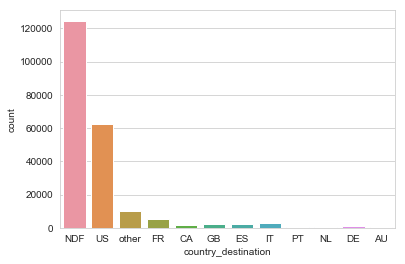

In [178]:
%matplotlib inline
sns.countplot(df['country_destination'])

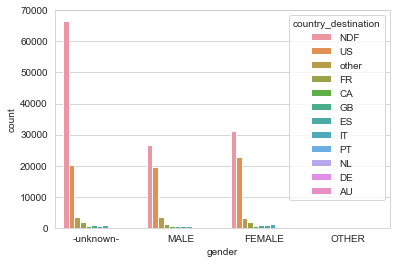

In [179]:
sns.countplot(df['gender'],hue=df['country_destination'])

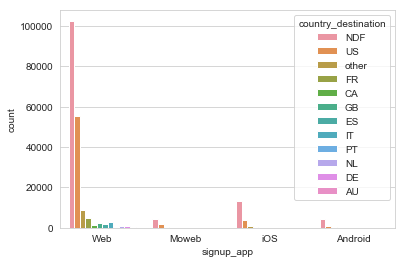

In [180]:
sns.countplot(df['signup_app'],hue=df['country_destination'])

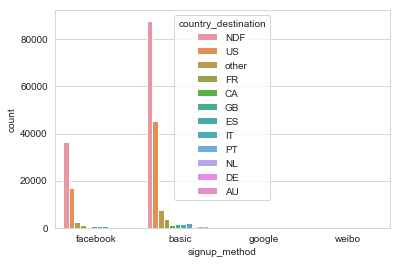

In [181]:
sns.countplot(df['signup_method'],hue=df['country_destination'])

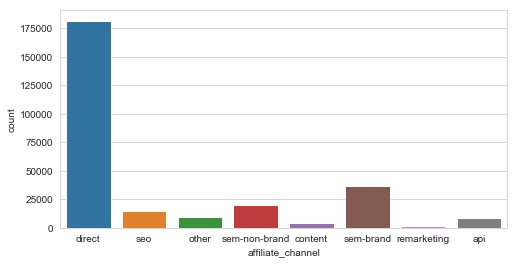

In [182]:
plt.figure(figsize=(8,4))
sns.countplot(df['affiliate_channel'])

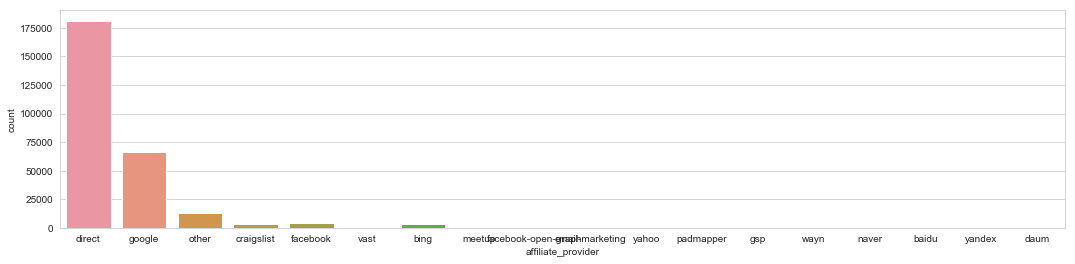

In [183]:
plt.figure(figsize=(18,4))
sns.countplot(df['affiliate_provider'])

In [184]:
##查看用戶註冊後到使用的時間
df.date_account_created = pd.to_datetime(df.date_account_created)
df.date_first_booking = pd.to_datetime(df.date_first_booking)
day = (df[df.date_first_booking.notna()].date_first_booking- df[df.date_first_booking.notna()].date_account_created)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


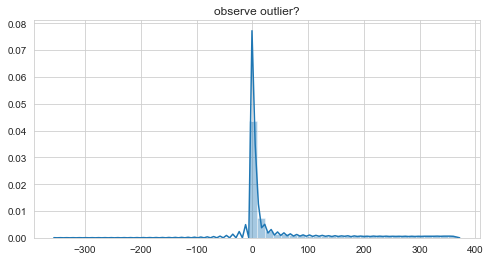

In [185]:
day_collect = []
for d in day:
    day_collect.append(int(d.days))
plt.figure(figsize= (8,4))
plt.title('observe outlier?')
sns.distplot(day_collect)

In [186]:
#有些outlier是創帳戶很久之後才用，但大部分的都是沒創多久就使用了(可能是臨時要訂房間所以辦個帳戶這樣)

In [187]:
##針對年齡做查看(同樣有缺失值)

In [188]:
df.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [189]:
df[df.age>1000]['age'].describe()

count     828.000000
mean     2007.117150
std        22.219408
min      1920.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [190]:
df[df.age< 18].age.describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [191]:
##16歲其實還算合理，５歲不太合理，我們可以將16歲當作一個filter(閥值)把數字濾掉。
#1歲有可能會是以公司名義創辦的帳號，有的公司會以創立年份當作歲數(但依舊屬於離群值可清除)

In [192]:
df_with_year = df.age>1000
#由於這份資料是2015年的data，回到那時的情況我們用2015處理。
df[df_with_year]['age']  = 2015 - df[df_with_year]['age']
#要用loc[filter ,  col_name]的寫法才可以讓Python知道要替換。
df.loc[df.age>95 , 'age'] = np.nan
df.loc[df.age < 16 , 'age'] = np.nan
df.age.describe()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    155816.000000
mean         36.013631
std          11.552798
min          16.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


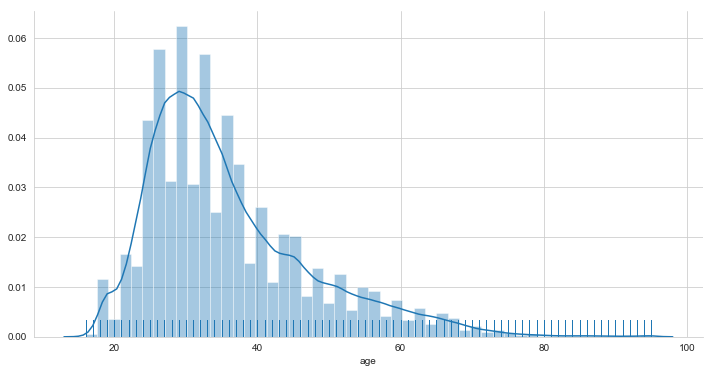

In [193]:
##做年齡分佈圖
plt.figure(figsize = (12 , 6))
sns.distplot(df.age.dropna() , rug = True)
sns.despine()

In [194]:
##觀察年齡分怖
#發現25~40歲左右是主要客群

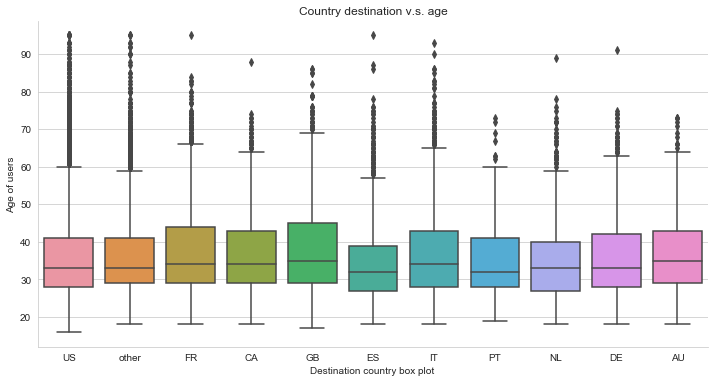

In [195]:
plt.figure(figsize =(12 , 6))
df_without_NDF = df[df.country_destination != 'NDF']
sns.boxplot(x = 'country_destination' , y = 'age' , data = df_without_NDF)
plt.xlabel('Destination country box plot ')
plt.ylabel('Age of users')
plt.title('Country destination v.s. age')
sns.despine()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


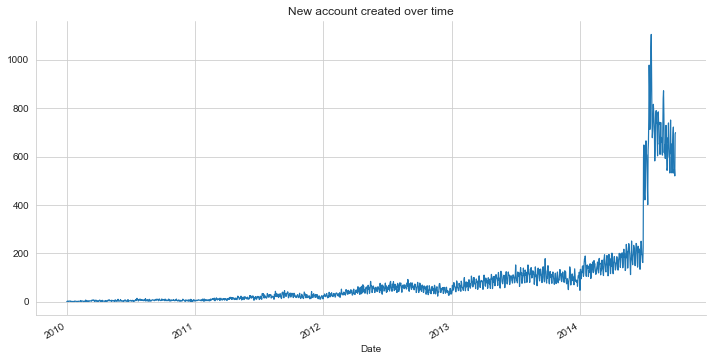

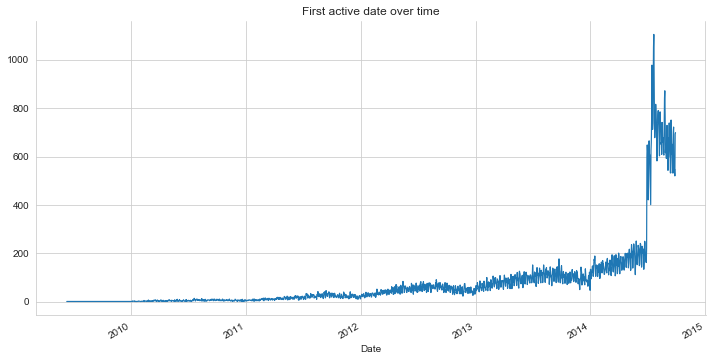

In [196]:
df_without_NDF['date_account_created'] = pd.to_datetime(df_without_NDF.date_account_created)
#因為他原本的timestamp記到很細節，我們把年月日抽出來就好
df_without_NDF.timestamp_first_active = pd.to_datetime(df_without_NDF.timestamp_first_active//1000000 , format='%Y%m%d')
#做時間序列的圖
plt.figure(figsize=(12 , 6))
df_without_NDF.date_account_created.value_counts().plot(kind = 'line' , linewidth = 1.2 )
plt.xlabel('Date')
plt.title('New account created over time')
sns.despine()
plt.figure(figsize = (12,6))
df_without_NDF.timestamp_first_active.value_counts().plot(kind = 'line' , linewidth = 1.2)
plt.title('First active date over time')
plt.xlabel('Date')
sns.despine()

In [197]:
ses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [198]:
#繪製用戶在每個sessions中花費的時間分佈

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


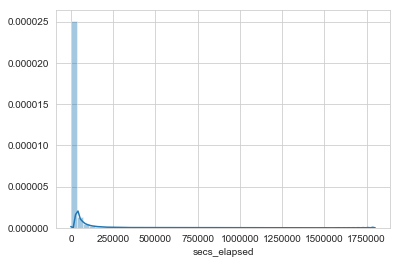

In [199]:
sns.distplot(ses[ses['secs_elapsed'].notnull()]['secs_elapsed'])

In [200]:
#幾乎所有會話的時間都少於5000秒

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


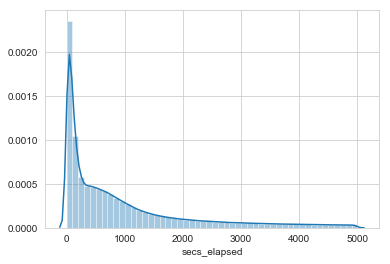

In [201]:
sns.distplot(ses[(ses['secs_elapsed'].notnull()) & (ses['secs_elapsed'] < 5000)]['secs_elapsed'])

In [202]:
#我們可以看到，大多數大於1000秒的會話數幾乎呈指數下降。
#可以假設大多數session的時間少於1000秒。

In [203]:
ses['secs_elapsed'].describe()

count    1.043171e+07
mean     1.940581e+04
std      8.888424e+04
min      0.000000e+00
25%      2.290000e+02
50%      1.147000e+03
75%      8.444000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

In [204]:
len(ses[ses['secs_elapsed'].isnull()])

136031

In [205]:
#用分佈的中位數填充不可用的值。我們使用中位數，因為如前所述，該分佈受異常值的影響很大。

In [206]:
median_secs = ses['secs_elapsed'].median()
ses['secs_elapsed'] = ses['secs_elapsed'].fillna(median_secs)

In [207]:
ses['secs_elapsed'].describe()

count    1.056774e+07
mean     1.917078e+04
std      8.833430e+04
min      0.000000e+00
25%      2.370000e+02
50%      1.147000e+03
75%      8.193000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64

In [208]:
ses['device_type'].value_counts()

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

In [209]:
#如上所示，人們正在使用13種類型的設備。

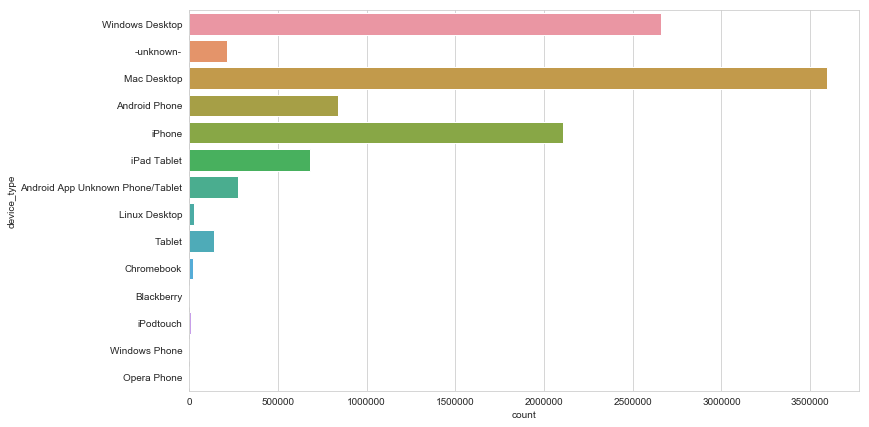

In [210]:
plt.figure(figsize=(12,7))
sns.countplot(y='device_type', data=ses)

In [211]:
#觀察男女目的地數據 不考慮從未預訂過Airbnb的用戶，或未在未列入課程的國家（NDF和其他）進行預訂的用戶。

In [212]:
df_inf = df[(df['country_destination'] != 'NDF') & (df['country_destination'] != 'other') & (df['gender'] != 'OTHER') & (df['gender'].notnull())]
df_inf = df[['id', 'gender', 'country_destination']]
df_inf.head()

,id,gender,country_destination
0,gxn3p5htnn,-unknown-,NDF
1,820tgsjxq7,MALE,NDF
2,4ft3gnwmtx,FEMALE,US
3,bjjt8pjhuk,FEMALE,other
4,87mebub9p4,-unknown-,US


In [213]:
observed = df_inf.pivot_table('id', ['gender'], 'country_destination', aggfunc='count').reset_index()
del observed.columns.name
observed = observed.set_index('gender')
observed

,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
gender,,,,,,,,,,,,
-unknown-,143,491,284,715,1713,758,1040,66670,227,69,20109,3469
FEMALE,207,455,358,853,1962,881,1091,31048,254,78,22694,3160
MALE,188,477,416,677,1335,682,699,26719,278,69,19457,3443
OTHER,1,5,3,4,13,3,5,106,3,1,116,22


In [214]:
#註冊方法和註冊設備之間的關係。
#大多數用戶通過標準的基本方法或通過Facebook進行註冊。
#多數使用桌面瀏覽器，移動瀏覽器或移動應用程序登錄。

#設備的類型（移動或計算機）是否會影響Airbnb的註冊方法
#忽略Google註冊方法，因為實例較少。
#我們將iOS，Moweb和Android視為移動設備類型。

In [215]:
df_signup = df[(df['signup_method'] != 'google')][['id', 'signup_method', 'signup_app']]
df_signup['device'] = df_signup['signup_app'].apply(lambda x: 'Computer' if x == 'Web' else 'Mobile')
df_signup.head()

,id,signup_method,signup_app,device
0,gxn3p5htnn,facebook,Web,Computer
1,820tgsjxq7,facebook,Web,Computer
2,4ft3gnwmtx,basic,Web,Computer
3,bjjt8pjhuk,facebook,Web,Computer
4,87mebub9p4,basic,Web,Computer


In [216]:
df_signup['signup_method'].value_counts()

basic       198222
facebook     74864
weibo           23
Name: signup_method, dtype: int64

In [217]:
df_signup['device'].value_counts()

Computer    219917
Mobile       53192
Name: device, dtype: int64

In [218]:
age_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [219]:
#將各個國家的年齡和性別統計數據可視化。

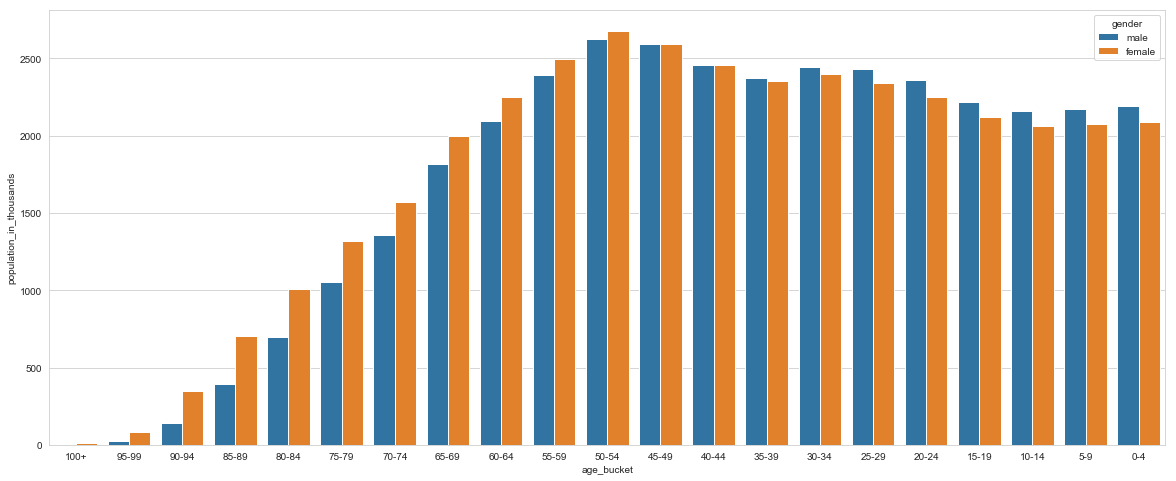

In [220]:
plt.figure(figsize=(20,8))
sns.barplot(x='age_bucket', y='population_in_thousands', hue='gender', data=age_gen, ci=None)

In [221]:
#觀察結果
#該統計數據中所代表的國家主要是人口老齡化。最大的群體是50-54歲的人群。。
#繪製每個國家的人口圖。

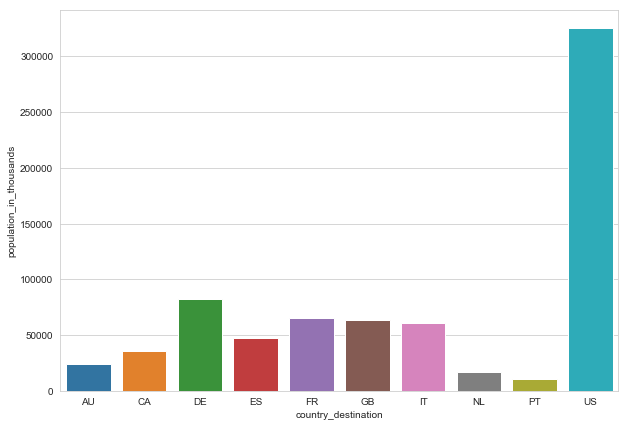

In [222]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
pop_stats = age_gen.groupby('country_destination')['population_in_thousands'].sum()
sns.barplot(x=pop_stats.index, y=pop_stats)

In [223]:
##美國顯然是目的地國中人口最多的國家，人口超過3億。列表中的所有其他國家/地區的人口不到1億。

In [224]:
df['gender'] = df['gender'].astype('category').cat.codes
df['signup_method'] = df['signup_method'].astype('category').cat.codes
df['language'] = df['language'].astype('category').cat.codes
df['affiliate_provider'] = df['affiliate_provider'].astype('category').cat.codes
df['first_browser'] = df['first_browser'].astype('category').cat.codes

In [225]:
df.loc[df.age>120,'age'] = np.nan
df.age.fillna(df.age.mean(),inplace=True)

In [226]:
dataTrain = df[pd.notnull(df['country_destination'])].sort_values(by=["id"])
dataTest = df[~pd.notnull(df['country_destination'])].sort_values(by=["id"])

dataTrain.columns

dataTrain = dataTrain[['country_destination','age','gender','language','signup_method','affiliate_provider','first_browser']]
dataTest = dataTest[['age','gender','language','signup_method','affiliate_provider','first_browser']]
dataTrain

,country_destination,age,gender,language,signup_method,affiliate_provider,first_browser
189274,US,31.000000,0,6,0,4,43
96509,NDF,36.013631,0,6,0,4,30
33893,US,36.013631,0,6,0,4,17
129396,US,40.000000,2,6,0,4,43
89437,other,36.013631,0,6,0,4,8
62600,US,38.000000,2,6,0,4,17
89424,NDF,41.000000,2,6,0,4,17
179944,NDF,36.013631,0,6,0,4,0
14391,US,34.000000,1,6,0,8,17
41835,AU,28.000000,1,6,0,4,8


In [227]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(dataTrain.iloc[:,1:], dataTrain.iloc[:,0])
dt.score(dataTrain.iloc[:,1:], dataTrain.iloc[:,0])

0.6568486444195624

In [228]:
pd.concat((pd.DataFrame(dataTrain.iloc[:0,1:].columns, columns = ['variable']),
          pd.DataFrame(dt.feature_importances_, columns=['importance'])),
         axis=1).sort_values(by='importance',ascending = False)[:20]
dt_res = dt.predict(dataTest)
submit['country'] = dt_res
submit['country'] = submit['country'].astype(str)
submit.to_csv('sub.csv',index=False)